In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
class_names = ['avião', 'carro', 'passaro', 'gato', 'cervo',
               'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

In [3]:
print("--- Carregando e pré-processando os dados do CIFAR-10 ---")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

--- Carregando e pré-processando os dados do CIFAR-10 ---
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train_encoded = keras.utils.to_categorical(y_train, 10)
y_test_encoded = keras.utils.to_categorical(y_test, 10)
print(f"Shape dos dados de treino: {x_train.shape}, Shape dos rótulos: {y_train_encoded.shape}")
print(f"Shape dos dados de teste: {x_test.shape}, Shape dos rótulos: {y_test_encoded.shape}")

Shape dos dados de treino: (50000, 32, 32, 3), Shape dos rótulos: (50000, 10)
Shape dos dados de teste: (10000, 32, 32, 3), Shape dos rótulos: (10000, 10)


In [5]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1)
])

model = keras.Sequential([
    data_augmentation,
    # Bloco 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Bloco 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Bloco 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    # MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),

    # Camada Densa
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Saída
    Dense(10, activation='softmax')
])

# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Treinamento do modelo
print("\n--- Iniciando o treinamento da CNN ---")
history = model.fit(x_train, y_train_encoded,
                    epochs=400,  # Aumente as épocas para dar ao Early Stopping tempo para agir
                    batch_size=32,
                    validation_data=(x_test, y_test_encoded))


--- Iniciando o treinamento da CNN ---
Epoch 1/400
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.2512 - loss: 2.3067 - val_accuracy: 0.4183 - val_loss: 1.6391
Epoch 2/400
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.4263 - loss: 1.5853 - val_accuracy: 0.4804 - val_loss: 1.4331
Epoch 3/400
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.4916 - loss: 1.4280 - val_accuracy: 0.5197 - val_loss: 1.4041
Epoch 4/400
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.5322 - loss: 1.3322 - val_accuracy: 0.5387 - val_loss: 1.3447
Epoch 5/400
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5561 - loss: 1.2682 - val_accuracy: 0.5962 - val_loss: 1.1539
Epoch 6/400
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5791 - loss: 1.2079 - val_accuracy: 0.6258 - val_loss: 1.0794
Epoch 7/400
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6038 - loss: 1.1516 - val_accuracy: 0.6760 - val_loss: 0.9457
Epoch 8/400
1563/1563 ━━━━━━━


--- Gerando a curva de erro de treinamento e validação ---


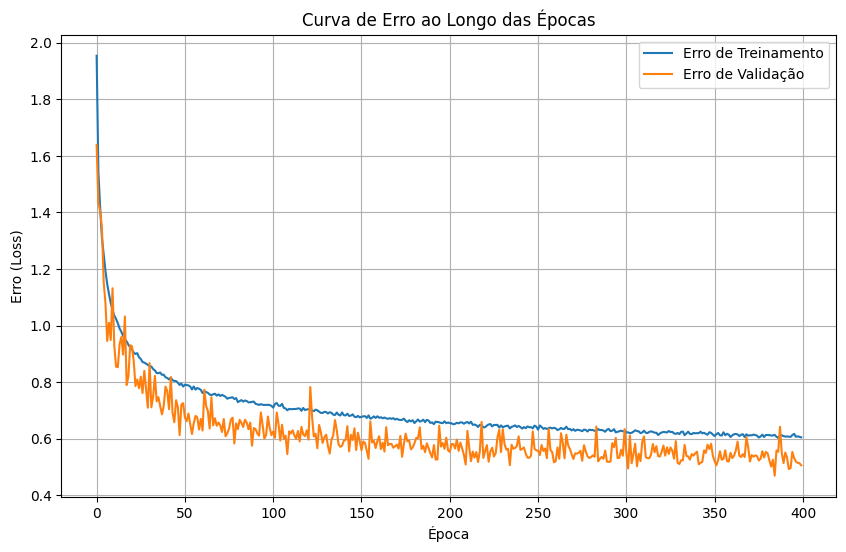

In [7]:
print("\n--- Gerando a curva de erro de treinamento e validação ---")
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.title('Curva de Erro ao Longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Erro (Loss)')
plt.legend()
plt.grid(True)
plt.show()


--- Gerando a matriz de confusão ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


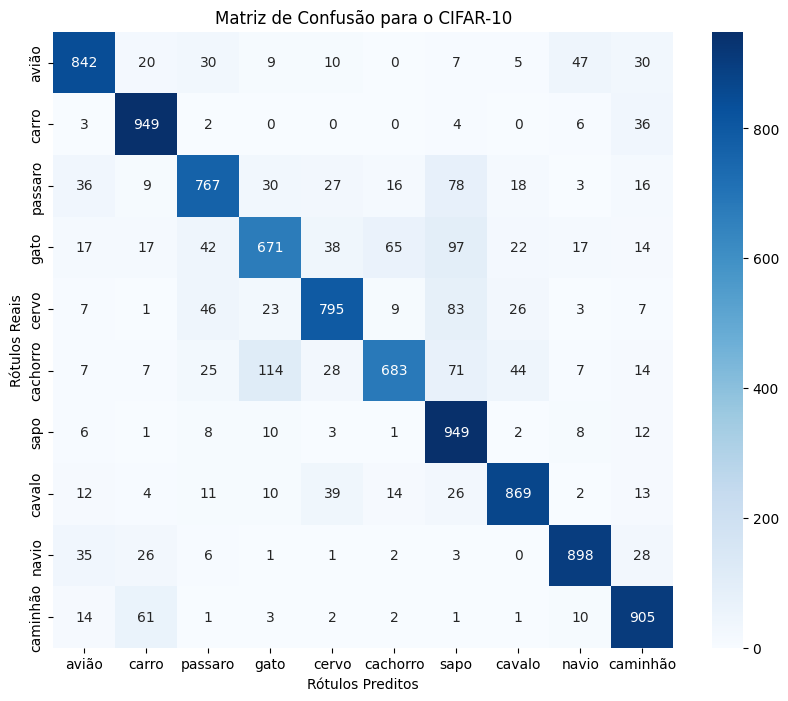


--- Relatório de Classificação ---
              precision    recall  f1-score   support

       avião       0.86      0.84      0.85      1000
       carro       0.87      0.95      0.91      1000
     passaro       0.82      0.77      0.79      1000
        gato       0.77      0.67      0.72      1000
       cervo       0.84      0.80      0.82      1000
    cachorro       0.86      0.68      0.76      1000
        sapo       0.72      0.95      0.82      1000
      cavalo       0.88      0.87      0.87      1000
       navio       0.90      0.90      0.90      1000
    caminhão       0.84      0.91      0.87      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



In [8]:
print("\n--- Gerando a matriz de confusão ---")
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Converte as probabilidades em classes preditas

# Cria a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plota a matriz de confusão em um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão para o CIFAR-10')
plt.ylabel('Rótulos Reais')
plt.xlabel('Rótulos Preditos')
plt.show()

# Exibe o relatório de classificação para métricas detalhadas
from sklearn.metrics import classification_report
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred, target_names=class_names))